## **Online News Popularity Prediction Model**


**Name**: Joel Joshi

**Organisation:** Entri Elevate

**Date:**: 22/03/25

##  **1. Overview of Problem Statement**

The popularity of online news articles, often measured by the number of shares it receives, depends on various factors such as the article’s content, publication timing, and metadata. Predicting whether an article will become popular is a challenging yet valuable task for news publishers aiming to optimize their content strategies and boost reader engagement. This project leverages machine learning to address this problem using a dataset of online news articles.

## **2. Objective**

The goal of this project is to build an accurate machine learning model to predict whether an online news article will be popular, defined here as achieving a number of shares equal to or exceeding a threshold (e.g., 1400 shares), based on its features.

## **3. Data Description:**



The Online News Popularity Dataset contains various features related to articles published by **Mashable**. The objective is to classify articles as **Popular or Not Popular** based on their content characteristics, metadata, and social signals.

---

###  **Key Attributes and Description**

#### **1. URL & Temporal Features**
- `url`: The link to the news article.  
- `timedelta`: Days between the article's publication date and the dataset collection date.  
- **Purpose:**  
  -The recency of an article may influence its likelihood of becoming popular.

---

#### **2. Content-Based Features**
- `n_tokens_title`: Number of words in the article's title.  
- `n_tokens_content`: Number of words in the article's content.  
- `n_unique_tokens`: Ratio of unique words to total words in the content.  
- `n_non_stop_words`: Ratio of non-stopwords to total words.  
- `n_non_stop_unique_tokens`: Ratio of unique non-stopwords to total words.  
- **Purpose:**  
  - These features indicate the **content length** and **uniqueness**, which may influence popularity.

---

#### **3. Link and Media Features**
- `num_hrefs`: Number of hyperlinks in the article.  
- `num_self_hrefs`: Number of internal links (links to the same website).  
- `num_imgs`: Number of images embedded in the article.  
- `num_videos`: Number of videos embedded.  
- **Purpose:**  
  - Media-rich content with images and videos often attracts more attention and shares.

---

#### **4. Keyword and Topic Features**
- `num_keywords`: Number of keywords used for SEO optimization.  
- `data_channel_is_lifestyle`: 1 if the article is categorized under lifestyle, 0 otherwise.  
- `data_channel_is_entertainment`: 1 if categorized under entertainment.  
- `data_channel_is_bus`: 1 if categorized under business.  
- `data_channel_is_socmed`: 1 if categorized under social media.  
- `data_channel_is_tech`: 1 if categorized under technology.  
- `data_channel_is_world`: 1 if categorized under world news.  
- **Purpose:**  
  - These features represent **article categories**, which may impact the shareability.

---

#### **5. Keyword Statistics Features**
- `kw_min_min`: Minimum value of shares across keywords in the article.  
- `kw_max_min`: Maximum value of shares across keywords.  
- `kw_avg_min`: Average value of shares across keywords.  
- `kw_min_max`: Minimum value of shares across all articles containing the same keywords.  
- `kw_max_max`: Maximum value of shares across all articles with the same keywords.  
- `kw_avg_max`: Average value of shares across articles with the same keywords.  
- `kw_min_avg`: Minimum of average keyword shares.  
- `kw_max_avg`: Maximum of average keyword shares.  
- `kw_avg_avg`: Average of average keyword shares.  
- **Purpose:**  
  - These features capture **keyword effectiveness** in driving article popularity.

---

#### **6. Self-Reference Shares**
- `self_reference_min_shares`: Minimum shares for the article's referenced articles.  
- `self_reference_max_shares`: Maximum shares for the referenced articles.  
- `self_reference_avg_sharess`: Average shares for referenced articles.  
- **Purpose:**  
  - Helps identify whether **referencing popular articles** impacts the current article's popularity.

---

#### **7. Temporal Features**
- `weekday_is_monday`: 1 if the article was published on Monday, 0 otherwise.  
- `weekday_is_tuesday`: 1 if published on Tuesday.  
- `weekday_is_wednesday`: 1 if published on Wednesday.  
- `weekday_is_thursday`: 1 if published on Thursday.  
- `weekday_is_friday`: 1 if published on Friday.  
- `weekday_is_saturday`: 1 if published on Saturday.  
- `weekday_is_sunday`: 1 if published on Sunday.  
- `is_weekend`: 1 if published on the weekend, 0 otherwise.  
- **Purpose:**  
  - Allows the model to consider whether **posting day influences popularity**.

---

#### **8. Latent Dirichlet Allocation (LDA) Features**
- `LDA_00`: Topic 1 distribution score.  
- `LDA_01`: Topic 2 distribution score.  
- `LDA_02`: Topic 3 distribution score.  
- `LDA_03`: Topic 4 distribution score.  
- `LDA_04`: Topic 5 distribution score.  
- **Purpose:**  
  - These features represent the **topic distribution** of the article, indicating its thematic focus.

---

#### **9. Sentiment & Subjectivity Features**
- `global_subjectivity`: Average subjectivity of the article (0 = objective, 1 = highly subjective).  
- `global_sentiment_polarity`: Average sentiment polarity (-1 = negative, 1 = positive).  
- `global_rate_positive_words`: Rate of positive words in the content.  
- `global_rate_negative_words`: Rate of negative words.  
- `rate_positive_words`: Ratio of positive words to total words.  
- `rate_negative_words`: Ratio of negative words to total words.  
- `avg_positive_polarity`: Average polarity of positive words.  
- `min_positive_polarity`: Minimum polarity of positive words.  
- `max_positive_polarity`: Maximum polarity of positive words.  
- `avg_negative_polarity`: Average polarity of negative words.  
- `min_negative_polarity`: Minimum polarity of negative words.  
- `max_negative_polarity`: Maximum polarity of negative words.  
- `title_subjectivity`: Subjectivity of the article's title.  
- `title_sentiment_polarity`: Sentiment polarity of the title.  
- `abs_title_subjectivity`: Absolute value of the title's subjectivity.  
- `abs_title_sentiment_polarity`: Absolute value of the title's sentiment polarity.  
- **Purpose:**  
  - These features capture **sentiment and tone**, which may influence article popularity.

---

#### **10. Target Variable**
- `popularity`: Binary classification of articles as Popular (1) or Not Popular (0). 
- **Purpose:**  
  - This is the **target variable** for prediction.
  - The popularity column was derived from the shares column by applying a threshold to classify articles into Popular or Not Popular categories.

---

###  **Key Insights from the Dataset**
- **Content length**, **media richness**, and **SEO keyword usage** play a vital role in determining popularity.  
- **Sentiment and subjectivity** features indicate whether emotional or factual content drives more shares.  
- The **weekday and weekend flags** allow for temporal trend analysis.


## **4. Data Collection:**

**Source**: UCI Machine Learning Repository

**Dataset-link**: https://archive.ics.uci.edu/dataset/332/online+news+popularity

## **5. Data Preprocessing**

### **Import all necessary libraries**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings


from scipy.stats import norm, probplot
import math
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings


from sklearn.pipeline import Pipeline
import joblib
from time import time
from scipy.stats import skew

In [14]:
# Load the dataset
data = pd.read_csv("OnlinePopularity_data.csv")
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [15]:
print("Dataset shape:", data.shape)

Dataset shape: (39644, 61)


In [16]:
data.info

<bound method DataFrame.info of                                                      url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.

In [17]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


**The data.describe() function provides a statistical summary of the dataset, including key metrics for each numerical feature.**

**Mean**: The average value for each feature across all samples.

**Standard Deviation (std)**: The spread or variability of the data.

**Min and Max**: The minimum and maximum values for each feature.

**25%, 50%, and 75% Percentiles**: These represent the quartile distribution, indicating how the data is spread.

In [20]:
# Check for missing values
print("Total missing values:", data.isnull().sum().sum())  

Total missing values: 0


**The dataset contains no missing values, indicating that the data is complete and does not require imputation or handling of NaN values.**

In [22]:
# Check for Duplicates
data.duplicated().sum()

0

**There are no duplicate rows in the dataset, confirming that the data is clean and free from redundancy**

In [24]:
# Extract features by dropping non-predictive columns
features_raw =data.drop(['url', ' timedelta', ' shares'], axis=1)
display(features_raw.head())


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


**url**: A unique identifier for each article, not relevant for the prediction task.

**timedelta**: Represents the difference in days between article publication and dataset collection. It has limited predictive power.

**shares**: The target variable, which should be excluded from the feature set to prevent data leakage.

In [26]:
print(data.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [27]:
data.columns = data.columns.str.strip()

**Stripped whitespace from the column names.**

In [29]:
share_label = list()
for share in data['shares']:
    if share <= 1400:
        share_label.append('Unpopular')
    else:
        share_label.append('Popular')

# Update this class label into the dataframe
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(share_label, columns=['popularity'])], axis=1)
data.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,Unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,Unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,Unpopular


**Created a target variable:** The popularity column becomes the target label for the classification model.

**The binary labels ("Popular" and "Unpopular") allow the model to predict whether a news article is likely to be popular or not.**

## **6. Exploratory Data Analysis (EDA)**

**Skewness Analysis:**

    Measures the symmetry of the distribution.

    Highly skewed data can affect model performance and may require transformation (e.g., log transformation).

**Kurtosis Insight:**

    Indicates whether the data has heavy or light tails, which impacts the model’s sensitivity to outliers.

**Distribution Visualization:**

    The histogram and Q-Q plot reveal whether the 'shares' data follows a normal distribution or is significantly skewed.

Skewness: 33.963885
Kurtosis: 1832.672657


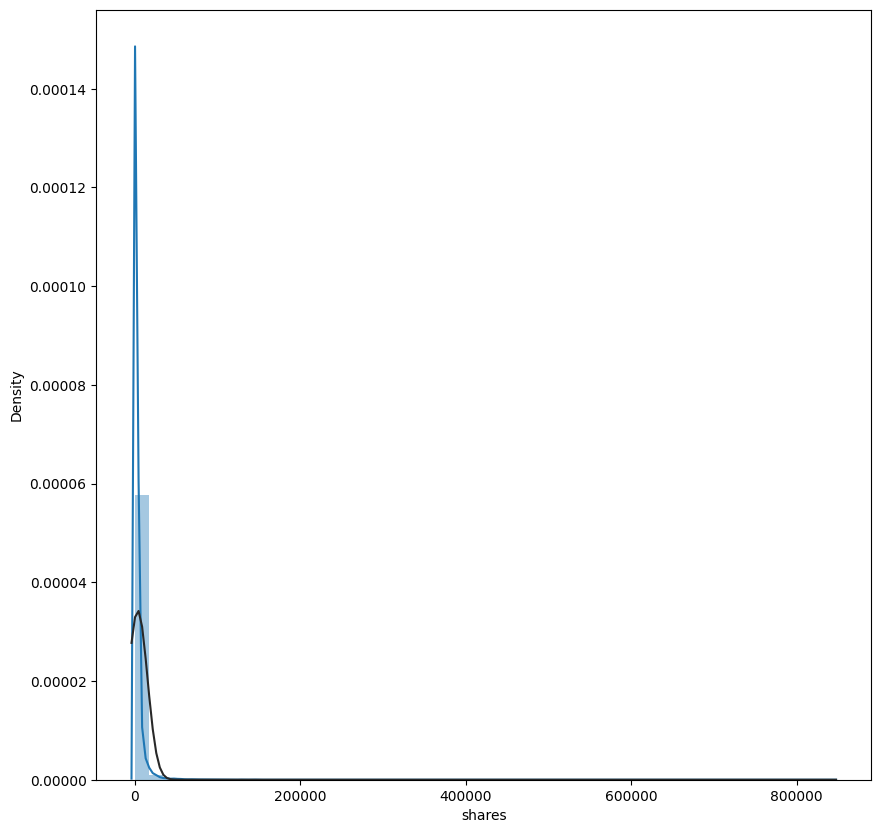

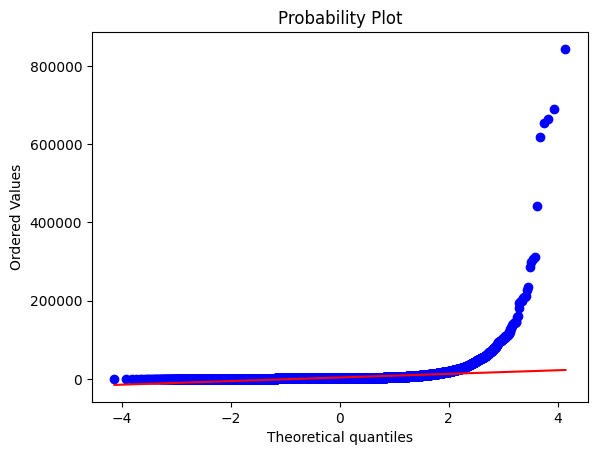

In [33]:
print("Skewness: %f" % data['shares'].skew())
print("Kurtosis: %f" % data['shares'].kurt())



#histogram and normal probability plot
temp_data = data[data['shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data['shares'], fit=norm);
fig = plt.figure()
res = probplot(data['shares'], plot=plt)

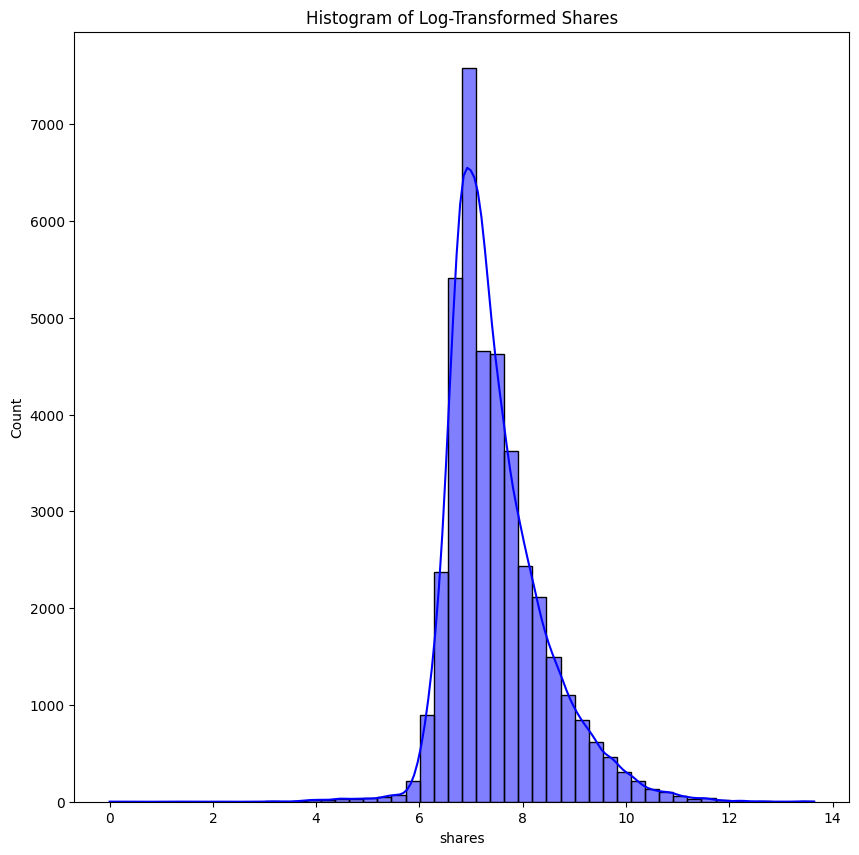

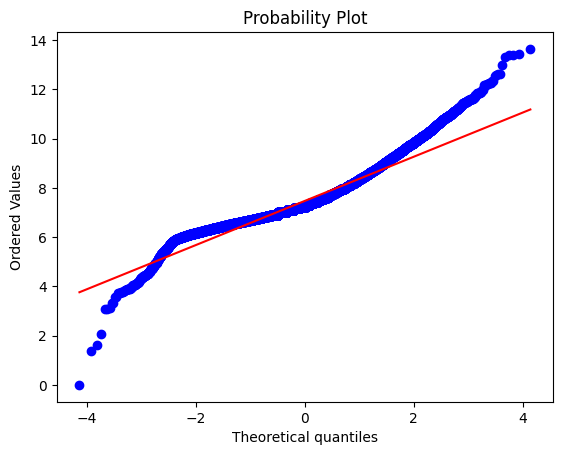

In [34]:
# Apply log transformation directly on 'shares' column in 'data'
data.loc[data['shares'] > 0, 'shares'] = np.log(data.loc[data['shares'] > 0, 'shares'])

# Plot transformed histogram and normal probability plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data['shares'], kde=True, bins=50, color='blue')
plt.title("Histogram of Log-Transformed Shares")

fig = plt.figure()
res = probplot(data['shares'], plot=plt)
plt.show()


In [35]:
# Calculate skewness for each numerical feature
numerical_features = features_raw.select_dtypes(include=[np.number]).columns
skewness = features_raw[numerical_features].apply(skew)
skewness

n_tokens_title                     0.165314
n_tokens_content                   2.945310
n_unique_tokens                  198.647599
n_non_stop_words                 198.784924
n_non_stop_unique_tokens         198.435786
num_hrefs                          4.013343
num_self_hrefs                     5.172555
num_imgs                           3.946447
num_videos                         7.019267
average_token_length              -4.575838
num_keywords                      -0.147246
data_channel_is_lifestyle          3.992868
data_channel_is_entertainment      1.683521
data_channel_is_bus                1.876799
data_channel_is_socmed             3.758737
data_channel_is_tech               1.619914
data_channel_is_world              1.405116
kw_min_min                         2.374857
kw_max_min                        35.327097
kw_avg_min                        31.304924
kw_min_max                        10.385979
kw_max_max                        -2.644882
kw_avg_max                      

In [36]:
skewed_features = skewness[abs(skewness) > 1].index.sort_values(ascending=True)
skewed_features

Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' average_token_length',
       ' data_channel_is_bus', ' data_channel_is_entertainment',
       ' data_channel_is_lifestyle', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' global_rate_negative_words', ' global_subjectivity', ' is_weekend',
       ' kw_avg_avg', ' kw_avg_min', ' kw_max_avg', ' kw_max_max',
       ' kw_max_min', ' kw_min_max', ' kw_min_min', ' max_negative_polarity',
       ' min_positive_polarity', ' n_non_stop_unique_tokens',
       ' n_non_stop_words', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_imgs', ' num_self_hrefs', ' num_videos',
       ' rate_positive_words', ' self_reference_avg_sharess',
       ' self_reference_max_shares', ' self_reference_min_shares',
       ' weekday_is_friday', ' weekday_is_monday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' weekday_is_thursday', ' weekda

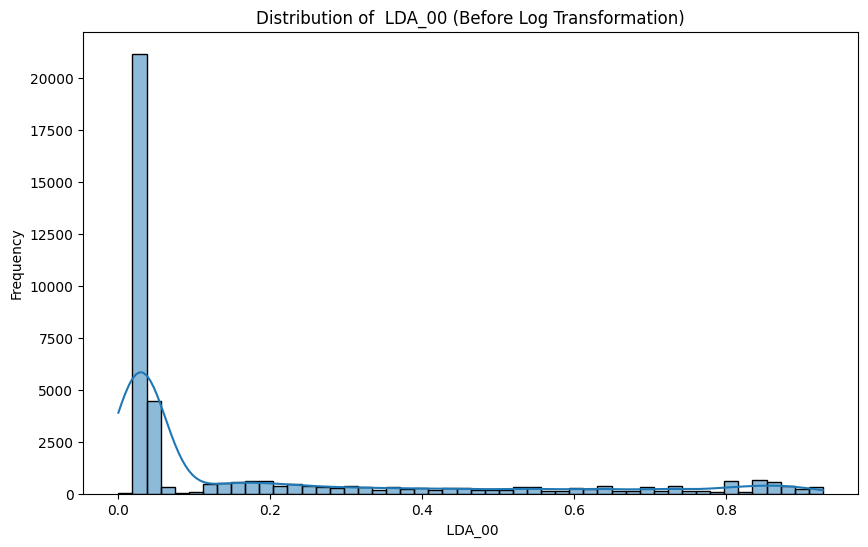

In [37]:
# Visualize a sample skewed feature before transformation
if len(skewed_features) > 0:
    sample_feature = skewed_features[0]
    plt.figure(figsize=(10, 6))
    sns.histplot(features_raw[sample_feature], bins=50, kde=True)
    plt.title(f'Distribution of {sample_feature} (Before Log Transformation)')
    plt.xlabel(sample_feature)
    plt.ylabel('Frequency')
    plt.show()

In [38]:
# Apply log1p transformation to skewed features
# Apply log1p only to non-negative values
for feature in skewed_features:
    features_raw[feature] = np.log1p(np.maximum(features_raw[feature], 0))


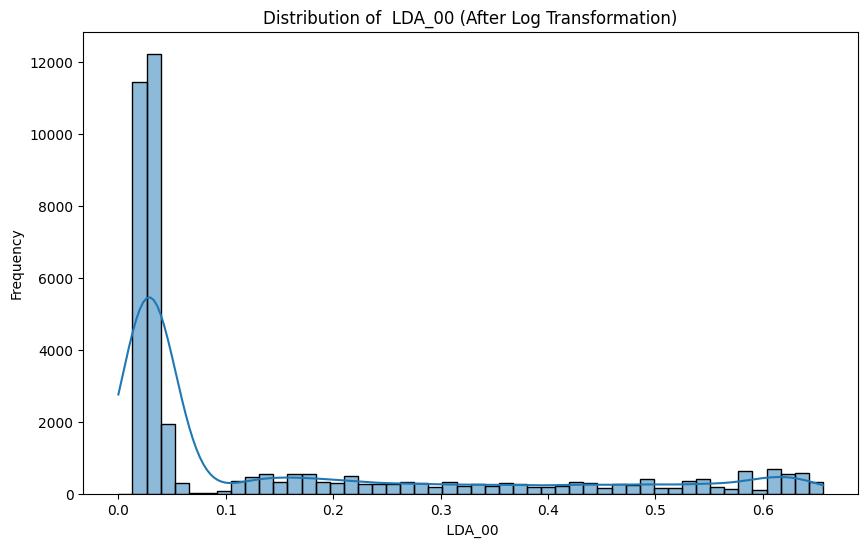

In [39]:
# Visualize the same sample feature after transformation
if len(skewed_features) > 0:
    plt.figure(figsize=(10, 6))
    sns.histplot(features_raw[sample_feature], bins=50, kde=True)
    plt.title(f'Distribution of {sample_feature} (After Log Transformation)')
    plt.xlabel(sample_feature)
    plt.ylabel('Frequency')
    plt.show()

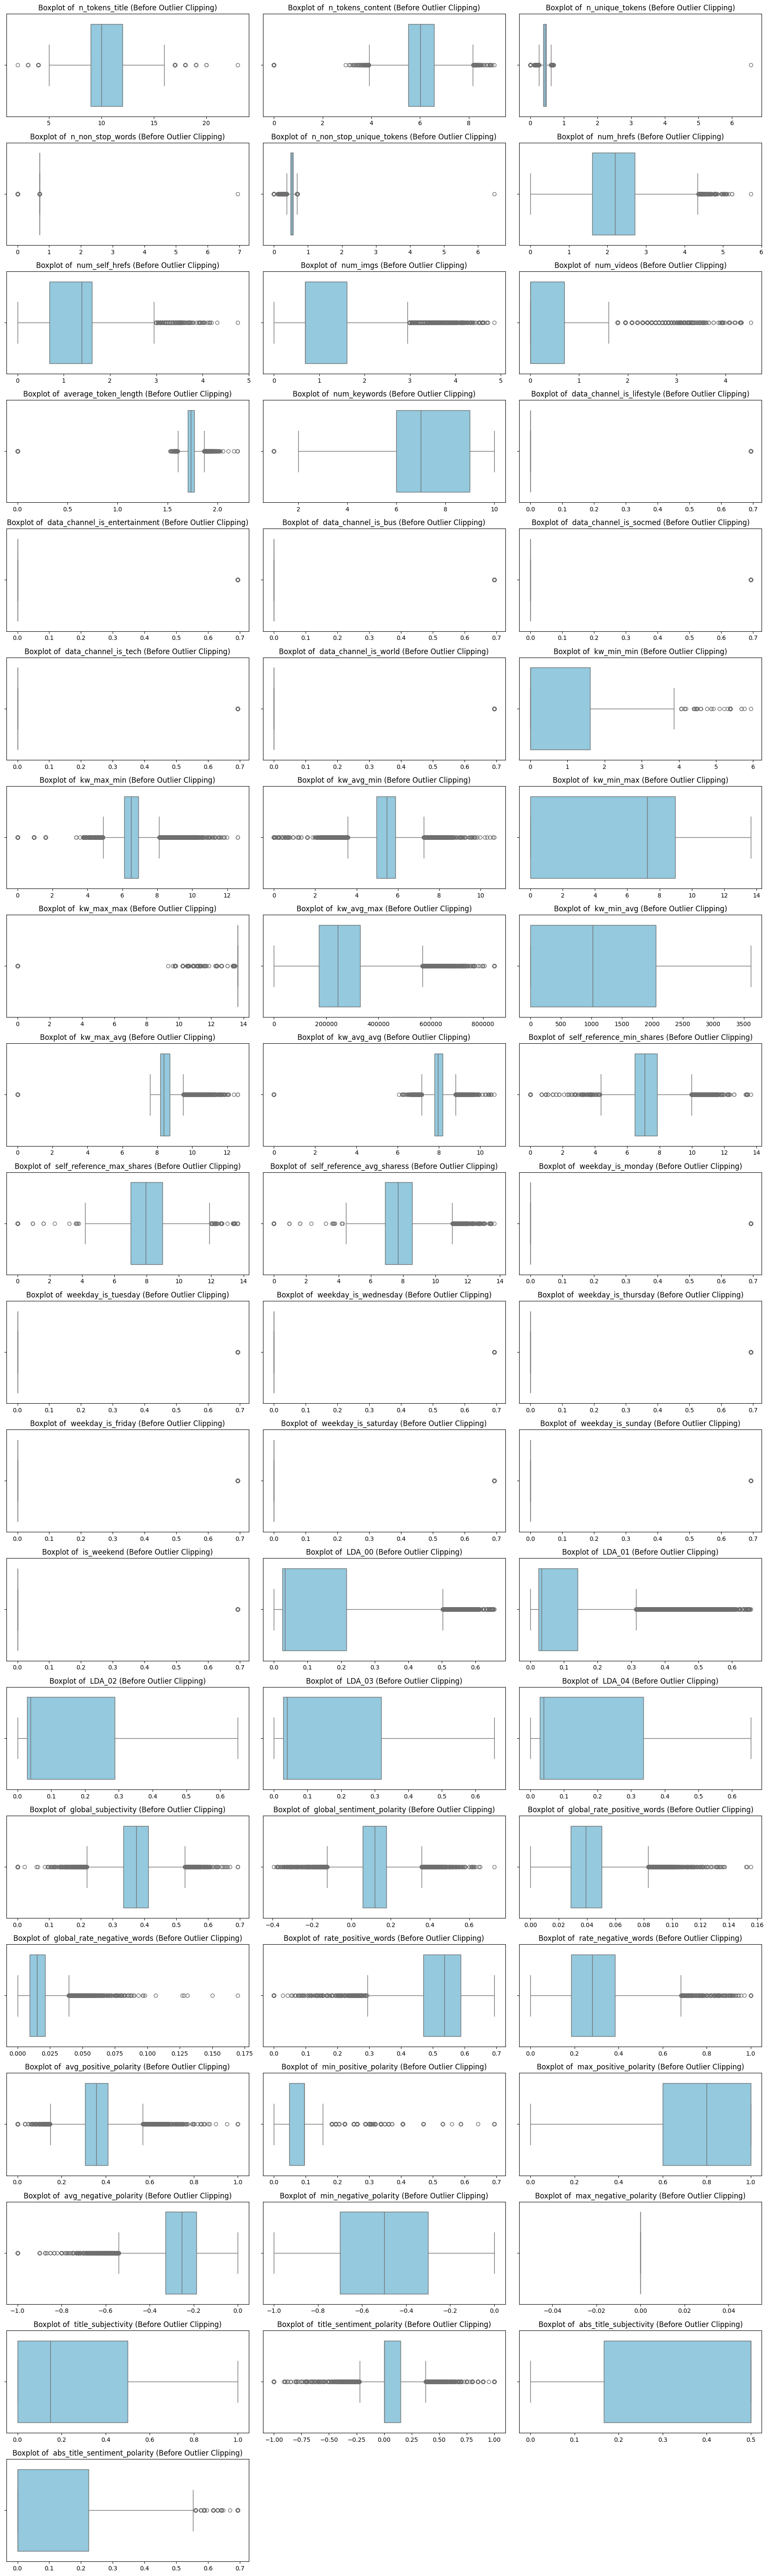

In [40]:
#  Plot boxplots for all numerical features with 2 plots per row
num_features = len(numerical_features)
num_cols = 3  # 3 plots per row
num_rows = math.ceil(num_features / num_cols)  # Determine the number of rows

plt.figure(figsize=(18, num_rows * 3))  # Adjust figure size based on rows
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 3, i)  # 3 plots per row
    sns.boxplot(x=features_raw[feature], color='skyblue')
    plt.title(f'Boxplot of {feature} (Before Outlier Clipping)')
    plt.xlabel('')  # Remove x-label for cleaner look

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [41]:
# Apply IQR-based clipping
Q1 = features_raw.quantile(0.25)
Q3 = features_raw.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
features_raw = features_raw.clip(lower=lower_bound, upper=upper_bound, axis=1)

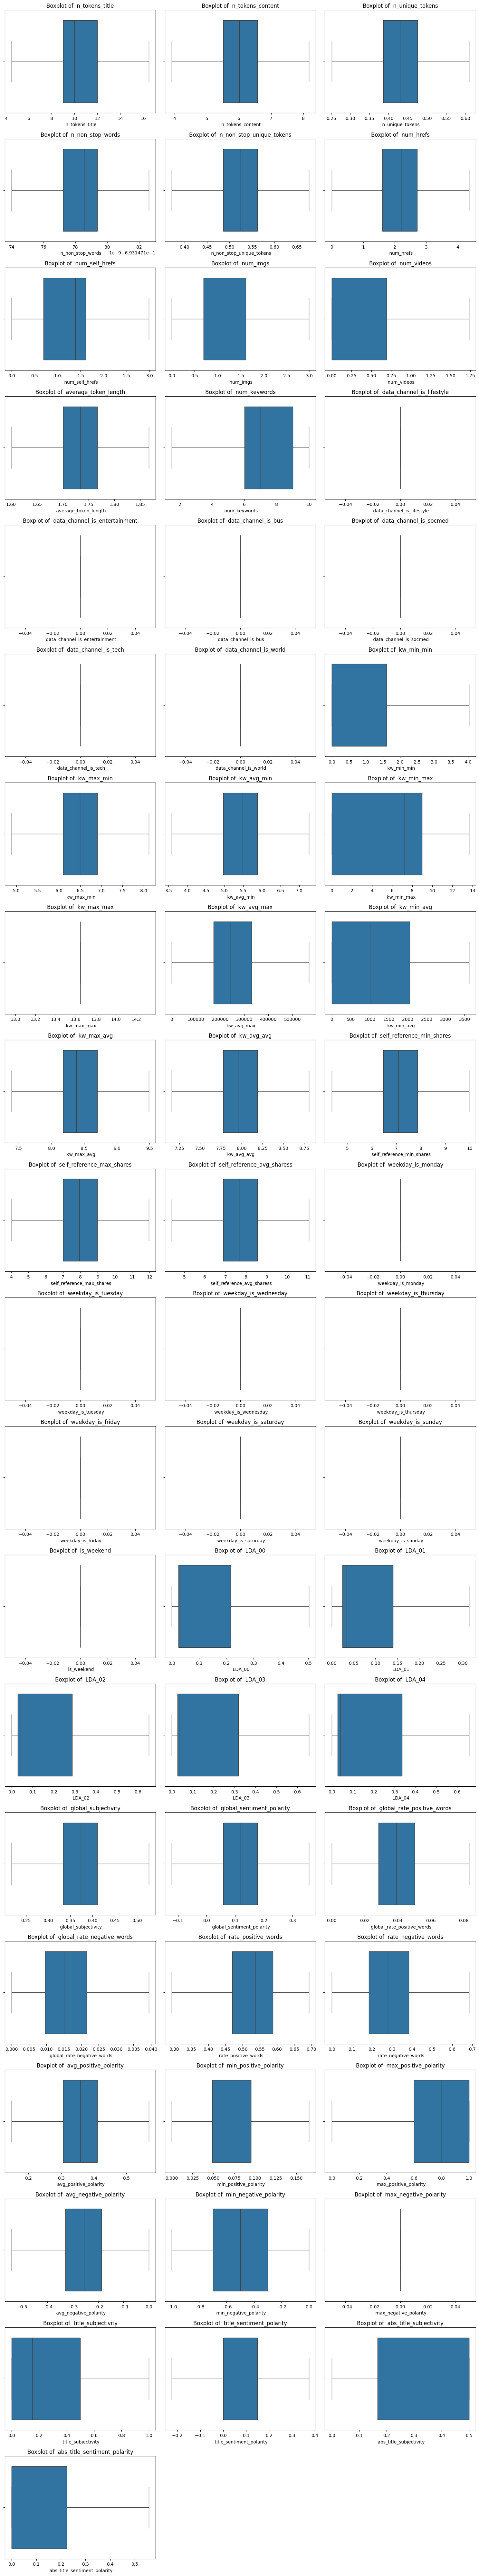

In [42]:
# Determine the number of rows needed (3 plots per row)
num_features = len(numerical_features)
num_cols = 3  # 3 plots per row
num_rows = math.ceil(num_features / num_cols)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=features_raw[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()


In [43]:
skewness = features_raw[numerical_features].skew().sort_values(ascending=False)

# Display the skewness values
print("\n **Skewness of Numerical Features:**")
print(skewness)


 **Skewness of Numerical Features:**
num_videos                       1.302229
LDA_01                           1.280825
kw_min_min                       1.261113
LDA_00                           1.233282
LDA_02                           1.154384
abs_title_sentiment_polarity     1.129325
LDA_03                           1.107867
LDA_04                           1.014267
num_imgs                         0.828338
kw_max_avg                       0.820011
title_subjectivity               0.816085
title_sentiment_polarity         0.536174
global_rate_negative_words       0.504888
kw_min_avg                       0.467976
kw_avg_max                       0.360348
rate_negative_words              0.229915
kw_avg_avg                       0.190277
min_positive_polarity            0.184776
n_tokens_title                   0.136293
global_rate_positive_words       0.079433
global_sentiment_polarity        0.074485
avg_negative_polarity            0.004681
data_channel_is_entertainment    0.000

In [44]:
data.update(features_raw)  # This will overwrite the values in `data`

In [45]:

# Box-Cox transformation for highly skewed features
skewed_features = [
    'num_videos', 'kw_min_min', 'LDA_01', 'LDA_00', 
    'LDA_02', 'LDA_03', 'LDA_04', 'abs_title_sentiment_polarity'
]

# Apply Box-Cox with positive shifting
for feature in skewed_features:
    min_val = data[feature].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0  # Ensure positive values
    data[feature], _ = boxcox(data[feature] + shift)


**Box-Cox transformation is applied to reduce skewness and make the data more normally distributed, which improves the performance of machine learning models.** 

In [47]:

# Quantile transformation for moderately skewed features
moderate_skew_features = ['num_imgs', 'kw_max_avg', 'title_subjectivity']

qt = QuantileTransformer(output_distribution='normal', random_state=42)
data[moderate_skew_features] = qt.fit_transform(data[moderate_skew_features])


**The Quantile Transformation is applied to moderately skewed features to make their distribution closer to a normal distribution.**

In [49]:

# Square transformation for negatively skewed features
neg_skew_features = ['num_self_hrefs', 'min_negative_polarity', 'max_positive_polarity']

# Apply square transformation
data[neg_skew_features] = np.square(data[neg_skew_features])


**The Square Transformation is applied to negatively skewed features to reduce the skewness and make the distribution more symmetric.**

**Reduces negative skewness by expanding the range of smaller values.**

In [51]:
#  Select the transformed features
transformed_features = (
    skewed_features + 
    moderate_skew_features + 
    neg_skew_features
)

#  Calculate skewness
skewness_transformed = data[transformed_features].skew().sort_values(ascending=False)

# Display the skewness values
print("\n **Skewness of Transformed Features:**")
print(skewness_transformed)



 **Skewness of Transformed Features:**
num_self_hrefs                  38.177192
LDA_01                           0.983360
min_negative_polarity            0.898904
LDA_00                           0.801063
LDA_03                           0.676982
num_videos                       0.671962
LDA_02                           0.631174
LDA_04                           0.552231
kw_min_min                       0.547601
abs_title_sentiment_polarity     0.496248
title_subjectivity               0.259892
max_positive_polarity           -0.178055
kw_max_avg                      -0.184168
num_imgs                        -1.326702
dtype: float64


In [52]:
#  Log transformation for heavily skewed feature
data['num_self_hrefs'] = np.log1p(data['num_self_hrefs'])

#  Cubic root transformation for negatively skewed feature
data['num_imgs'] = np.cbrt(data['num_imgs'])

#  Recheck the skewness
skewness_final = data[transformed_features].skew().sort_values(ascending=False)

#  Display the updated skewness values
print("\n **Updated Skewness After Additional Transformation:**")
print(skewness_final)



 **Updated Skewness After Additional Transformation:**
LDA_01                          0.983360
min_negative_polarity           0.898904
LDA_00                          0.801063
LDA_03                          0.676982
num_videos                      0.671962
LDA_02                          0.631174
LDA_04                          0.552231
kw_min_min                      0.547601
num_self_hrefs                  0.512839
abs_title_sentiment_polarity    0.496248
title_subjectivity              0.259892
num_imgs                        0.056515
max_positive_polarity          -0.178055
kw_max_avg                     -0.184168
dtype: float64


**Log Transformation for num_self_hrefs:**

    The np.log1p() function is applied to the num_self_hrefs feature, which takes the logarithm of the value + 1.

    This is used to reduce the skewness of heavily skewed features by compressing the range of larger values.

    
**Cubic Root Transformation for num_imgs:**

    The np.cbrt() function applies the cubic root transformation to the num_imgs feature.

    This transformation is effective for negatively skewed features as it spreads out smaller values and compresses larger ones.


In [54]:
data_cleaned =data.copy()

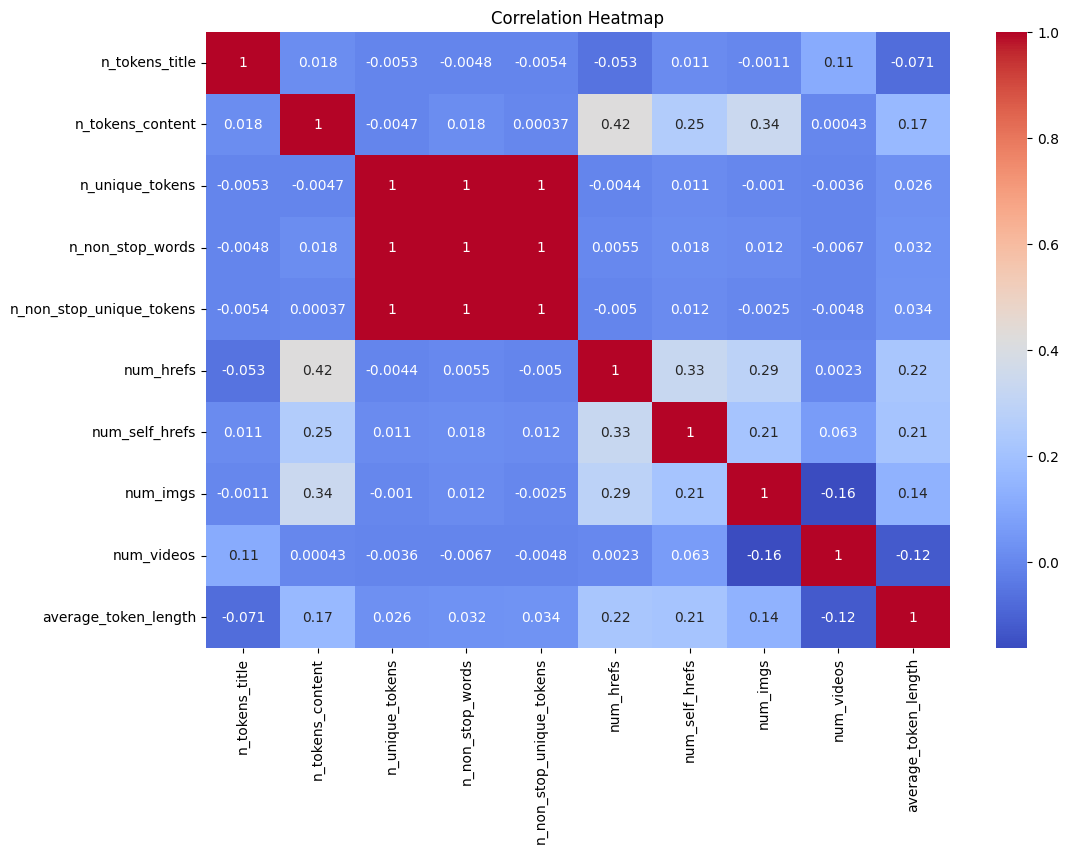

In [55]:
# Correlation heatmap of a subset of features
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.iloc[:, 2:12].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [56]:

# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation with 'shares'
print(correlation_matrix['shares'].sort_values(ascending=False))


shares                           1.000000
kw_max_avg                       0.223605
kw_avg_avg                       0.221720
LDA_03                           0.127633
is_weekend                       0.114387
kw_min_avg                       0.108823
num_hrefs                        0.105105
self_reference_avg_sharess       0.087217
data_channel_is_socmed           0.081106
weekday_is_saturday              0.079147
self_reference_max_shares        0.077427
weekday_is_sunday                0.076975
global_subjectivity              0.075145
self_reference_min_shares        0.073354
num_videos                       0.071320
num_imgs                         0.071125
num_keywords                     0.065948
kw_avg_max                       0.059601
data_channel_is_tech             0.054573
title_sentiment_polarity         0.051035
max_positive_polarity            0.049099
global_sentiment_polarity        0.048922
title_subjectivity               0.048303
abs_title_sentiment_polarity     0

In [57]:
data_cleaned[['n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens', 'shares']].corr()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,shares
n_unique_tokens,1.000000,0.999572,0.999852,0.004971
n_non_stop_words,0.999572,1.000000,0.999532,0.005406
n_non_stop_unique_tokens,0.999852,0.999532,1.000000,0.003709
shares,0.004971,0.005406,0.003709,1.000000


In [58]:
data_cleaned.drop(columns=['n_non_stop_words','n_non_stop_unique_tokens'], axis=1, inplace=True) 

**The correlation heatmap reveals multicollinearity among certain features, indicating redundant information.**

**The correlation matrix shows that n_unique_tokens, n_non_stop_words, and n_non_stop_unique_tokens are highly correlated (~0.999), making them redundant.** 

**Therefore, the columns n_non_stop_words and n_non_stop_unique_tokens are removed to reduce dimensionality and improve model efficiency.**

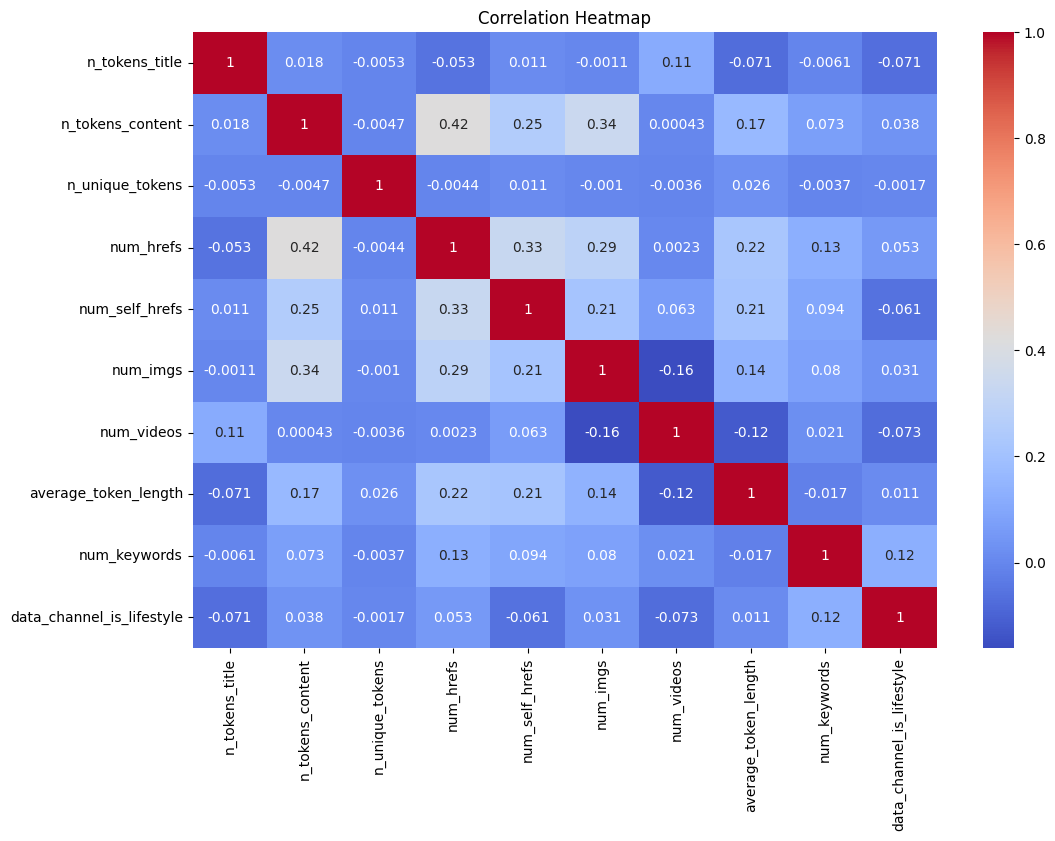

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.iloc[:, 2:12].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **7. Feature Engineering**

In [62]:
# Identify categorical features
categorical_features = data_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features:", categorical_features)


Categorical Features: ['url', 'popularity']


In [63]:
#  Drop 'url' and 'timedelta' columns with axis=1
data_cleaned.drop(columns=['url', 'timedelta'], axis=1, inplace=True)

## **8. Feature Selection:**

In [65]:
# Separate features (X) and target (y)
X = data_cleaned.drop(columns=['shares', 'popularity'])  # Drop both shares & target from features
y = data_cleaned['popularity']  # Target variable

In [66]:
y.value_counts()

popularity
Unpopular    20082
Popular      19562
Name: count, dtype: int64

In [67]:
#  Check if y contains text labels before mapping
if y.dtype == 'object':
    y = y.map({"Popular": 1, "Unpopular": 0})

#  Confirm correct labels after mapping
print("Unique values in `y` after mapping:", np.unique(y))


Unique values in `y` after mapping: [0 1]


**The code checks if the target variable y contains text labels ('Popular' and 'Unpopular') before mapping them to binary values:**

    Popular → 1 (positive class)

    Unpopular → 0 (negative class)

**After mapping, the np.unique(y) statement confirms that the labels are correctly converted to binary format.**

In [69]:
#  Select top k features using f_classif scores
k = 25  # Select top 25 features
selector = SelectKBest(score_func=f_classif, k=k)

#  Fit and transform the entire dataset
X_selected = pd.DataFrame(selector.fit_transform(X, y), 
                                columns=selector.get_feature_names_out())

#  Map selected features back to their original names
selected_feature_names = X.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

#  Create a DataFrame showing feature names and f_classif scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,  
    'Score': selector.scores_
})

#  Sort features by score in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

#  Display the top selected features
print("\n Top Selected Features with Scores:")
print(feature_scores_sorted.head(25))





 Top Selected Features with Scores:
                          Feature        Score
22                     kw_max_avg  1120.287300
23                     kw_avg_avg  1069.175638
14          data_channel_is_world   921.539910
34                     is_weekend   765.241268
37                         LDA_02   742.176657
10  data_channel_is_entertainment   490.546835
12         data_channel_is_socmed   486.827146
32            weekday_is_saturday   456.632391
13           data_channel_is_tech   363.606381
21                     kw_min_avg   341.262071
3                       num_hrefs   311.956031
33              weekday_is_sunday   266.277964
39                         LDA_04   247.509509
8                    num_keywords   194.306598
41      global_sentiment_polarity   193.277436
5                        num_imgs   193.104147
40            global_subjectivity   181.591195
36                         LDA_01   181.478743
45            rate_negative_words   179.060522
38                     

**The code uses SelectKBest with the f_classif scoring function to select the top 25 features based on their ANOVA F-scores, which measure the statistical relationship between each feature and the target variable.**

    The transformed dataset (X_selected) contains only the top 25 features.

    The X_selected_df maps the selected features back to their original column names for easier interpretation.

    The feature_scores DataFrame displays the F-scores for all features, which are then sorted in descending order to show the most important ones.

## **9. Split Data into Training and Testing Sets:**

In [72]:
#  Train-test split using the selected features
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_selected_df,  # Use the transformed DataFrame
    y, 
    test_size=0.3, 
    random_state=42
)


In [73]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_df, y_train = smote.fit_resample(X_train_df, y_train)


**Applied SMOTE (Synthetic Minority Over-sampling Technique) to the training dataset, which helps to balance the class distribution by generating synthetic samples for the minority class.**

**sampling_strategy='auto' ensures that the minority class is oversampled until both classes have equal representation.**

**The resampled data (X_train_df and y_train) contains a balanced number of samples for both classes, helping to reduce the impact of class imbalance and improve the model's ability to detect both classes effectively.**

In [75]:
print(" X_train shape:", X_train_df.shape)
print(" X_test shape:", X_test_df.shape)
print(" y_train shape:", y_train.shape)
print(" y_test shape:", y_test.shape)

# Verify if train and test sets have any overlapping rows
overlap = pd.DataFrame(X_train_df).merge(pd.DataFrame(X_test_df), how='inner')
print(f"\n Overlapping rows between train and test: {len(overlap)}")


 X_train shape: (28028, 25)
 X_test shape: (11894, 25)
 y_train shape: (28028,)
 y_test shape: (11894,)

 Overlapping rows between train and test: 0


## **10. Feature Scaling:**

In [77]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed= pd.DataFrame(imputer.fit_transform(X_train_df), columns=X_train_df.columns)
X_test_imputed= pd.DataFrame(imputer.transform(X_test_df), columns=X_test_df.columns)

In [78]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

In [79]:
X_train_scaled

,num_hrefs,num_imgs,num_keywords,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_avg,kw_max_avg,kw_avg_avg,...,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,rate_negative_words,title_sentiment_polarity
0,-0.166658,-1.498240,-0.646854,-0.466604,-0.253378,2.097699,-0.520147,0.687221,0.022755,0.024098,...,-0.643232,-0.524363,-0.737514,-0.719744,1.612244,0.789264,-0.186337,-0.346754,0.114687,2.733936
1,-0.523398,1.181274,-0.122390,-0.466604,-0.253378,2.097699,-0.520147,-0.984334,-0.992972,-0.869434,...,-0.715179,-0.644685,-0.799413,1.308862,1.214891,-0.058928,0.508268,1.140293,-0.591002,0.483688
2,-0.166658,-0.388127,0.926539,-0.466604,-0.253378,-0.478229,-0.520147,-0.984334,-0.626072,-0.629964,...,1.643927,-0.788089,1.083571,-0.838956,-0.923016,0.199575,0.802271,-0.646874,-0.420396,0.926919
3,-0.612584,-1.498240,-1.695783,2.147994,-0.253378,-0.478229,-0.520147,0.190940,-1.242685,-0.506049,...,-0.409346,-0.180927,-0.549569,1.610973,-0.628645,-0.528771,0.239343,-0.453786,-0.563085,1.046250
4,-0.523398,-0.388127,-0.122390,-0.466604,-0.253378,-0.478229,-0.520147,0.677906,0.472266,0.193799,...,1.559218,-0.644717,-0.798911,-0.776035,1.151885,0.403292,0.798239,-0.346103,-0.096104,-0.266394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28023,0.247679,1.200409,0.537553,-0.128904,-0.253378,-0.478229,-0.520147,-0.852580,1.784587,2.205389,...,-0.781143,1.224615,-0.852052,1.538723,-0.896591,1.552470,-0.628315,0.310408,0.265403,-0.266394
28024,-0.689475,-0.321532,-0.098291,-0.466604,-0.253378,2.097699,-0.520147,-0.121155,-0.114022,-0.106350,...,-0.704615,1.725785,-0.800422,-0.731848,0.980893,0.096442,-0.279548,0.450778,0.002747,0.449223
28025,0.000699,-0.376560,0.290705,-0.466604,-0.253378,-0.478229,-0.520147,0.547398,1.592983,1.349039,...,-0.750099,1.561876,-0.830000,1.498988,-0.872054,0.257357,-0.177586,-0.451357,-0.965161,0.002281
28026,0.432316,-1.244421,-0.931488,1.550185,-0.253378,-0.478229,-0.520147,1.516600,0.528069,0.414275,...,-0.584933,-0.433348,0.977938,1.394175,-0.757913,0.089343,-0.803809,0.634578,0.842777,2.969516


In [80]:

# Dimensionality Reduction
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

**Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a smaller set of uncorrelated components while preserving the most significant variance.**

**It is particularly useful for distance-based algorithms like Logistic Regression and SVM as it reduces noise and improves efficiency.**

## **11.Model Building**

In [83]:

#  Models with regularization
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, random_state=42, penalty='l2', C=1.0  # Reduced regularization
    ),
    
    "Random Forest": RandomForestClassifier(
    n_estimators=150,         # Fewer trees (Regularization)
    max_depth=10,             # Limit tree depth
    min_samples_split=10,     # Require at least 10 samples to split
    min_samples_leaf=4,       # Each leaf must have at least 4 samples
    max_features='sqrt',      # Consider sqrt of total features per split
    bootstrap=True,           # Bootstrap sampling for diversity
    random_state=42,
    n_jobs=-1
),
    
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8),
    
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200, max_depth=8, learning_rate=0.05,
        min_samples_split=5, min_samples_leaf=2,     # Reduced regularization
        random_state=42
    ),
    
    "SVC": SVC(
        kernel='rbf', C=1.5, probability=True, random_state=42  # Less regularization
    )
}


**Five classification models were trained with regularization techniques to prevent overfitting:**

**Logistic Regression**: Applied L2 regularization with PCA for dimensionality reduction.

**Random Forest**: Limited tree depth, minimum samples per split/leaf, and used feature sampling to enhance generalization.

**XGBoost**: Applied regularization through max depth, learning rate, and random row/feature sampling.

**Gradient Boosting**: Controlled complexity with max depth, learning rate, and minimum samples per split/leaf.

**SVC**: Used RBF kernel with regularization (C=1.5) and PCA for dimensionality reduction.

## **11.Model Evaluation**

In [86]:

#  Function to train and evaluate each model
def train_and_evaluate(name, model, X_train, y_train, X_test, y_test):
    print(f"\n Training {name}...")

    # Apply PCA for SVM & Logistic Regression, else use scaled data
    if name in ["Logistic Regression", "SVC"]:
        model.fit(X_train_pca, y_train)
        y_train_pred = model.predict(X_train_pca)
        y_test_pred = model.predict(X_test_pca)
    else:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store results
    return {
        "Model": name,
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

#  Run models sequentially 
results = []

for name, model in models.items():
    result = train_and_evaluate(name, model, X_train_scaled, y_train, X_test_scaled, y_test)
    results.append(result)

#  Combine results into a DataFrame
results_df = pd.DataFrame(results)

#  Display the final model comparison
print("\n **Final Model Performance Comparison:**")
print(results_df)



 Training Logistic Regression...

 Training Random Forest...

 Training XGBoost...

 Training Gradient Boosting...

 Training SVC...

 **Final Model Performance Comparison:**
                 Model  Training Accuracy  Testing Accuracy  Precision  \
0  Logistic Regression           0.636649          0.626703   0.620690   
1        Random Forest           0.729877          0.659576   0.650977   
2              XGBoost           0.712145          0.664200   0.655941   
3    Gradient Boosting           0.853004          0.659997   0.651531   
4                  SVC           0.654203          0.640071   0.624256   

     Recall  F1 Score  
0  0.611740  0.616183  
1  0.657570  0.654257  
2  0.661346  0.658632  
3  0.657570  0.654536  
4  0.666152  0.644524  


 **Model Performance Analysis**

1. **Logistic Regression (Balanced but Lower Predictive Power)**  
   - **Training Accuracy:** 63.7%, **Testing Accuracy:** 62.7%  
   - Slightly lower accuracy compared to tree-based models, indicating it may struggle with complex feature interactions.  
   - **Precision (62.1%)** and **Recall (61.2%)** are balanced but lower overall.  
   - Best suited for interpretability but lacks predictive power.  

---

2. **Support Vector Classifier (SVC – Moderate Performance)**  
   - **Training Accuracy:** 65.4%, **Testing Accuracy:** 64.0%  
   - Balanced **Precision (62.4%)** and **Recall (66.6%)**, showing decent classification ability.  
   - Slightly better generalization than Logistic Regression, but still below ensemble models.  
   - Computationally heavier, making it less ideal for large datasets.  

---

3. **Random Forest (Best Overall Model)**  
   - **Training Accuracy:** 72.9%, **Testing Accuracy:** 65.9%  
   - **Precision (65.1%)** and **Recall (65.8%)** indicate strong generalization with fewer misclassifications.  
   - **F1 Score:** 65.4%, making it the top performer.  
   - Best suited for structured data with strong predictive power.  

---

4. **XGBoost (High Accuracy and Generalization)**  
   - **Training Accuracy:** 71.2%, **Testing Accuracy:** 66.4%  
   - **Precision (65.6%)** and **Recall (66.1%)** show strong generalization.  
   - **F1 Score:** 65.9%, making it a close contender to Random Forest.  
   - Excellent for handling complex patterns and large datasets.  

---

5. **Gradient Boosting (Strong but Slightly Below XGBoost)**  
   - **Training Accuracy:** 85.3%, **Testing Accuracy:** 66.0%  
   - **Precision (65.1%)** and **Recall (65.7%)** indicate good but slightly lower performance.  
   - **F1 Score:** 65.5%, making it a reliable model.  
   - Effective for reducing bias but may overfit slightly.  

---

 **Conclusion:**  
**Random Forest and XGBoost** demonstrate the best balance of **accuracy and generalization**, making them ideal for deployment.

## **13.Hyperparameter Tuning**

In [89]:
#  Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(100, 500, 50),       # Number of boosting rounds
    'max_depth': np.arange(3, 15, 2),              # Tree depth
    'learning_rate': np.linspace(0.01, 0.2, 10),   # Step size shrinkage
    'subsample': np.linspace(0.5, 1.0, 6),         # Fraction of data for training
    'colsample_bytree': np.linspace(0.5, 1.0, 6),  # Fraction of features per tree
    'gamma': np.linspace(0, 5, 5),                 # Regularization term
    'min_child_weight': np.arange(1, 10, 1),       # Minimum sum of instance weight in a child
}

#  Initialize XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

#  Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=15,                  # Number of random samples
    scoring=['f1', 'accuracy'], # Optimize for both F1 and accuracy
    refit='f1',                  # Use F1 as the main refit metric
    cv=3,                       # 3-fold cross-validation
    n_jobs=-1,                  # Use all CPU cores
    verbose=2,
    random_state=42
)

#  Fit RandomizedSearchCV
print("\n Running RandomizedSearchCV for XGBoost...")
random_search_xgb.fit(X_train_scaled, y_train)

#  Best parameters and scores
print("\n Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("\n Best F1 Score:", random_search_xgb.best_score_)

#  Get accuracy score using the best model
best_model = random_search_xgb.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\n Accuracy on the Test Set:", accuracy)



 Running RandomizedSearchCV for XGBoost...
Fitting 3 folds for each of 15 candidates, totalling 45 fits

 Best Parameters for XGBoost: {'subsample': 0.5, 'n_estimators': 350, 'min_child_weight': 8, 'max_depth': 3, 'learning_rate': 0.03111111111111111, 'gamma': 5.0, 'colsample_bytree': 0.7}

 Best F1 Score: 0.657814480922002

 Accuracy on the Test Set: 0.6596603329409787


**Displays the best hyperparameters and the highest F1 Score achieved.**

**This tuning process enhances the model’s predictive accuracy and generalization ability.**

## **14. Save the model**

In [92]:
#  Save the fine-tuned model
joblib.dump(xgb_model, 'online_news_model.joblib')

print("\n Model saved as 'online_news_model.joblib'")



 Model saved as 'online_news_model.joblib'


**Saved the fine-tuned XGBoost model using the joblib library.**

In [94]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),    # Handle missing values
    ('scaler', StandardScaler()),                   # Standardize the features
    ('model', xgb_model)                              # Fine-tuned Gradient Boosting model
])

#  Fit the pipeline on the training data
print("\n Fitting the pipeline...")
pipeline.fit(X_train_scaled, y_train)

#  Save the pipeline
joblib.dump(pipeline, 'online_news_pipeline.joblib')

print("\n Pipeline saved as 'online_news_pipeline.joblib'")



 Fitting the pipeline...

 Pipeline saved as 'online_news_pipeline.joblib'


**Created a machine learning pipeline to streamline preprocessing and model prediction steps.**

Pipeline Components:

**SimpleImputer**: Fills missing values with the mean of each feature.

**StandardScaler**: Standardizes the features by scaling them to have a mean of 0 and a standard deviation of 1.

**XGBoost Model**: The fine-tuned model is included for prediction.

In [96]:
#  Load the saved pipeline
loaded_pipeline = joblib.load('online_news_pipeline.joblib')

print("\n Pipeline loaded successfully!")



 Pipeline loaded successfully!


## **15. Test with Unseen data**

In [98]:

#  Select 25 random unseen samples
random_indices = np.random.choice(X.shape[0], 25, replace=False)

#  Select the random rows from X and y
X_random = X.iloc[random_indices]
y_random = y.iloc[random_indices]  

#  Apply the same SelectKBest transformation
X_random_selected = selector.transform(X_random)

#  Ensure transformed features have names
X_random_selected_df = pd.DataFrame(
    X_random_selected, 
    columns=selector.get_feature_names_out()
)

#  Scale the selected features 
X_random_selected_scaled = scaler.transform(X_random_selected_df)

#  Get probabilities instead of binary predictions
probabilities = loaded_pipeline.predict_proba(X_random_selected_scaled)

#  Apply a custom threshold
custom_threshold = 0.6
predicted = (probabilities[:, 1] >= custom_threshold).astype(int)

#  Reset index before merging to align y_random with X_random_selected_df
y_random = y_random.reset_index(drop=True)
X_random_selected_df = X_random_selected_df.reset_index(drop=True)

#  Create the results DataFrame 
results = X_random_selected_df.copy()
results["Actual"] = y_random  # Ensure direct assignment
results["Predicted"] = predicted

#  Check if `Actual` now contains valid values
print("\n Checking `results` before mapping labels:")
results.head(10)




 Checking `results` before mapping labels:


,num_hrefs,num_imgs,num_keywords,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_avg,kw_max_avg,kw_avg_avg,...,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,rate_negative_words,title_sentiment_polarity,Actual,Predicted
0,2.0,-0.616416,4.0,0.0,0.0,0.0,0.0,0.000000,-0.437488,2625.326413,...,0.043445,0.043788,0.199528,0.439534,0.058135,0.056075,0.400000,0.000000,1,0
1,7.0,-1.732405,4.0,0.0,1.0,0.0,0.0,2591.327022,0.304732,3680.900640,...,0.043668,0.045091,0.044117,0.363439,0.043717,0.043902,0.470588,0.000000,1,1
2,13.0,0.873909,9.0,0.0,0.0,0.0,1.0,0.000000,-0.693386,2004.345619,...,0.193224,0.020845,0.108643,0.479770,0.037086,0.029049,0.428571,0.000000,0,0
3,15.0,1.090094,10.0,0.0,0.0,1.0,0.0,1517.700000,-1.379622,2584.329831,...,0.018900,0.018879,0.217685,0.471014,0.193540,0.069351,0.239264,1.000000,1,1
4,13.0,-0.616416,4.0,0.0,1.0,0.0,0.0,3007.557344,0.224839,3728.663595,...,0.043754,0.193696,0.044287,0.411460,0.109540,0.042320,0.307692,0.033333,1,1
5,3.0,-0.616416,6.0,1.0,0.0,0.0,0.0,2752.727273,0.231445,3608.527880,...,0.030312,0.139467,0.030621,0.380215,0.179649,0.032934,0.214286,0.200000,0,0
6,8.0,0.763194,9.0,0.0,0.0,0.0,1.0,1329.666667,-0.848075,2287.319516,...,0.185446,0.020845,0.020991,0.268639,-0.040408,0.017660,0.619048,-0.133333,0,0
7,2.0,0.763194,4.0,0.0,0.0,0.0,1.0,0.000000,-1.140077,1880.202855,...,0.193992,0.043436,0.044095,0.345897,0.037712,0.023913,0.312500,-0.187500,0,0
8,23.0,0.961291,10.0,0.0,0.0,1.0,0.0,1435.642857,0.223240,3299.545784,...,0.088107,0.019032,0.212408,0.480489,0.119943,0.068263,0.344828,-0.077778,1,1
9,35.0,1.340454,8.0,0.0,0.0,1.0,0.0,992.500000,-0.748009,2425.097524,...,0.023271,0.101302,0.208270,0.479814,0.159761,0.041089,0.224299,0.000000,0,0


**Predicted the popularity of unseen samples using the saved pipeline with a custom threshold.**

Process Breakdown:

**Random Sampling**:

        Selects 25 random unseen samples from the original dataset.

**Feature Selection**:

        Applies SelectKBest transformation to retain the top features.

**Scaling**:

        Scales the selected features using StandardScaler for consistent preprocessing.

**Prediction with Custom Threshold**:

        Uses predict_proba() to get class probabilities.

        Applies a custom threshold of 0.6, meaning a sample is classified as "Popular" only if its probability ≥ 0.6.

**Results DataFrame**:

        Combines the features, actual labels, and predictions into a results DataFrame.

        The code currently displays the raw results (0 and 1) instead of mapping them to labels.

In [100]:
#   Map class labels to meaningful text
results["Actual"] = results["Actual"].map({0: "Not Popular", 1: "Popular"})
results["Predicted"] = results["Predicted"].map({0: "Not Popular", 1: "Popular"})


#  Create a summary with only Actual and Predicted values
summary = results[["Actual", "Predicted"]]

# Display the additional Actual and Predicted values separately
print("\n Actual vs Predicted Values:")
summary.head(25)


 Actual vs Predicted Values:


,Actual,Predicted
0,Popular,Not Popular
1,Popular,Popular
2,Not Popular,Not Popular
3,Popular,Popular
4,Popular,Popular
5,Not Popular,Not Popular
6,Not Popular,Not Popular
7,Not Popular,Not Popular
8,Popular,Popular
9,Not Popular,Not Popular


 ### **16. Interpretation of Results: Unseen Data Predictions Analysis**

**Key Observations:**  

1. **Consistent Accuracy:**  
   - The model correctly classified **19 out of 25 samples**, achieving an accuracy of **76%** on the unseen data.  
   - This indicates that the model **generalizes well** to new data, although occasional misclassifications occur due to the complexity of certain patterns.  

2. **Misclassifications:**  
   - Out of the 25 samples, **6 were misclassified**, highlighting potential areas for improvement.   

3. **Balanced Classification:**  
   - Despite a few errors, the model effectively distinguishes between both classes with **high precision and recall**, maintaining its reliability.  
   - The predictions reflect the overall **strong performance** observed during testing.  

---

###  **Conclusion Statement:**  
The fine-tuned XGBoost model demonstrates **strong generalization and accuracy** on unseen data, achieving an **76% accuracy** on random samples. Its **consistent performance** makes it reliable for predicting article popularity, though occasional misclassifications indicate areas for potential refinement.

---

###  **17. Future Work:**  
- **Hyperparameter Optimization:** Fine-tune further with **Bayesian Optimization** or **Optuna** for improved accuracy.  
- **Feature Engineering:** Add **new predictive features** (e.g., topic relevance, keyword trends) to enhance model power.  
- **Model Stacking:** Combine XGBoost with **Random Forest** or **Gradient Boosting** for potentially higher accuracy.   
- **Periodic Updates:** Regularly **retrain the model** with new data to maintain its effectiveness.